<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_naive_bayes.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab -- Naive Bayes

References: 

* [Section 5.05 from VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html) -- github
* [1.9 Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) -- scikit-learn.org
* [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) -- wikipedia
* [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) -- wikipedia

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set some plotting parameters
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 16})
colors = ('red', 'blue')
cmap = ListedColormap(colors)

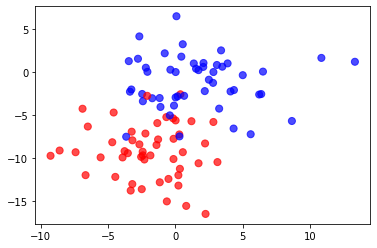

In [ ]:
from sklearn.datasets import make_blobs

std_true = 3    # original: 1.5
n_samples = 100   # original: 100

# Generate some random Gaussian blobs as data
X, y = make_blobs(n_samples, 2, centers=2, random_state=2, cluster_std=std_true)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap, alpha=.7);

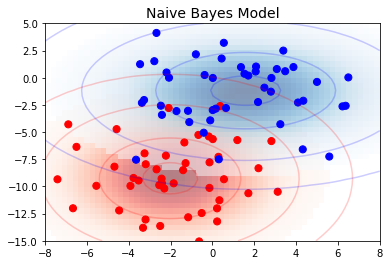

In [ ]:
# Plot the data on the Gaussian probability densities
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(colors):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);


# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);

# Confusion matrix

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch06/images/06_08.png" width="300"/>

Define a convenience function for plotting the confusion matrix.

### References 

* Rasckha's [ch06.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb)
* [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) -- scikit-learn.org
* [heatmap](https://matplotlib.org/3.3.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) -- matplotlib.org